# Limpeza dos Dados e Análise Geral

O presente notebook tem como foco realizar a limpeza do dataset proveniente das atividades físicas (pedalada e corrida) do aplicativo Strava
O dataset foi baixado diretamente da página do app, e algumas colunas que não possuíam dados foram previamente excluídas.\

Algumas análises gerais são apresentadas ao fim do notebook, com pedaladas e corridas consieradas juntas.

- O primeiro passo é, portanto, adicionar as bibliotecas que serão utilizadas ao longo das análises:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import time
from IPython import display
from xml.dom import minidom
import math
import warnings as wn

wn.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_style('whitegrid')

- Aplicar 3 casa decimais à todos os dataframes:

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

- Ler o dataset `activities`, e mostrar as 5 primeiras linhas:

In [3]:
df = pd.read_csv('activities.csv')

In [4]:
df.head()

,ID da atividade,Data da atividade,Nome da atividade,Tipo de atividade,Tempo decorrido,Distância,Nome do arquivo,Tempo decorrido.1,Tempo de movimentação,Distância.1,Velocidade máx.,Ganho de elevação,Elevação mínima,Elevação máxima,Inclinação máxima,Inclinação média
0,1961127693,12 de nov de 2018 20:09:58,Lab-Bandeco,Pedalada,713,3.110,activities/1961127693.gpx,713,664,"3,118.200",7.200,52.165,611.600,654.000,10.100,1.164
1,1961222122,12 de nov de 2018 20:56:21,Bandeco-Rep,Pedalada,967,5.790,activities/1961222122.gpx,967,963,"5,798.700",12.500,48.106,582.000,654.100,10.500,-0.828
2,1961955647,13 de nov de 2018 09:35:55,Rep-Lab,Pedalada,1510,6.120,activities/1961955647.gpx,1510,1206,"6,126.300",10.900,67.473,580.600,619.900,10.200,0.186
3,1963151981,13 de nov de 2018 20:19:09,Lab-Bandeco,Pedalada,682,3.150,activities/1963151981.gpx,682,675,"3,158.000",7.500,52.305,611.400,654.000,10.200,1.159
4,1963151998,13 de nov de 2018 21:13:23,Bandeco-Rep,Pedalada,870,5.750,activities/1963151998.gpx,870,870,"5,753.100",12.300,47.461,582.000,654.000,9.500,-0.853


# 1. Limpeza dos Dados

A etapa de limpeza dos dados visa detectar e corrigir dados que estejam corrompidos e/ou errados, valores faltantes, como também deletar dados irrelevantes.

1 -  Drop em variáveis irrelevantes:

In [5]:
df.drop(['ID da atividade','Nome da atividade','Tempo decorrido.1'], axis=1, inplace=True)

2 - Renomear algumas colunas, adicionando suas respectivas unidades:

In [6]:
df = df.rename(columns={'Tempo decorrido':'Tempo decorrido (s)', 
                   'Tempo de movimentação':'Tempo de movimentação (s)',
                    'Distância':'Distância (km)','Distância.1':'Distância (m)',
                  'Nome do arquivo':'Arquivo gpx','Velocidade máx.':'Velocidade máx. (m/s)',
                  'Ganho de elevação':'Ganho de elevação (m)',
                  'Elevação mínima':'Elevação mínima (m)','Elevação máxima':'Elevação máxima (m)',
                  'Inclinação máxima':'Inclinação máxima (graus)',
                  'Inclinação média':'Inclinação média (graus)'})

3 - Checar se existem valores nulos em alguma das variáveis:

In [7]:
df.isnull().sum()

Data da atividade            0
Tipo de atividade            0
Tempo decorrido (s)          0
Distância (km)               0
Arquivo gpx                  0
Tempo de movimentação (s)    0
Distância (m)                0
Velocidade máx. (m/s)        0
Ganho de elevação (m)        0
Elevação mínima (m)          0
Elevação máxima (m)          0
Inclinação máxima (graus)    0
Inclinação média (graus)     0
dtype: int64

Nota-se que não existem valores nulos para nenhum das variáveis.

4 - Checar os tipos de dados de cada coluna:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data da atividade          175 non-null    object 
 1   Tipo de atividade          175 non-null    object 
 2   Tempo decorrido (s)        175 non-null    int64  
 3   Distância (km)             175 non-null    float64
 4   Arquivo gpx                175 non-null    object 
 5   Tempo de movimentação (s)  175 non-null    int64  
 6   Distância (m)              175 non-null    float64
 7   Velocidade máx. (m/s)      175 non-null    float64
 8   Ganho de elevação (m)      175 non-null    float64
 9   Elevação mínima (m)        175 non-null    float64
 10  Elevação máxima (m)        175 non-null    float64
 11  Inclinação máxima (graus)  175 non-null    float64
 12  Inclinação média (graus)   175 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 1

Apenas as variáveis objeto estão fora de padrão, e serão convertidas agora. Por hora, a variável `Data da atividade` será mantida como string, assim como as demais:

In [9]:
# Data da atividade
df['Data da atividade'] = df['Data da atividade'].astype(str)

# Tipo de atividade
df['Tipo de atividade'] = df['Tipo de atividade'].astype(str)

# Arquivo gpx
df['Arquivo gpx'] = df['Arquivo gpx'].astype(str)

5 - A seguir, checar se existem valores zero para alguma das variáveis:

In [10]:
df.eq(0).any()

Data da atividade            False
Tipo de atividade            False
Tempo decorrido (s)          False
Distância (km)               False
Arquivo gpx                  False
Tempo de movimentação (s)    False
Distância (m)                False
Velocidade máx. (m/s)        False
Ganho de elevação (m)        False
Elevação mínima (m)          False
Elevação máxima (m)          False
Inclinação máxima (graus)    False
Inclinação média (graus)      True
dtype: bool

Única variável com valores zero é `Inclinação média (graus)`, mas não é um problema.

6 - Próximo passo é separar Data Geral entre Data e Hora, para posterior análise temporal:

In [11]:
data = np.array(df['Data da atividade'].tolist()) # as np

d=[]; m=[]; y_h=[]
for el in data:
    d.append(el.split(' de ')[0]) # dia
    m.append(el.split(' de ')[1]) # mês
    y_h.append(el.split(' de ')[2]) # ano + hora

y=[]; h=[];
for el in y_h:
    y.append(el.split(' ')[0]) # ano
    h.append(el.split(' ')[1]) # hora
    

- Mapear mês:

In [12]:
map_mes = {'jan':'01','fev':'02','mar':'03','abr':'04','mai':'05','jun':'06',
           'jul':'07','ago':'08','set':'09','out':'10','nov':'11','dez':'12'
          }

m = [map_mes[key] for key in m]

- Juntar ano, mês e dia:

In [13]:
data = []

for i in range(len(y)):
    data.append(y[i]+'-'+m[i]+'-'+d[i])

- Agora que temos novas colunas com Data e Hora, podemos remover a coluna `Data da atividade`, que possuía a data geral:

In [14]:
df.drop(['Data da atividade'],axis=1,inplace=True)

- Atribuir os valores de data e hora para as variáveis `Data da atividade` e `Hora da atividade`, respectivamente:

In [15]:
df['Data da atividade'] = data
df['Hora da atividade'] = h

- Transformar ambas variáveis para datetime do Pandas:

In [16]:
df['Data da atividade'] = pd.to_datetime(df['Data da atividade'], format='%Y-%m-%d')

In [17]:
df['Hora da atividade'] = pd.to_datetime(df['Hora da atividade'], format='%H:%M:%S')

- Coloca a variável `Data da atividade` como índice:

In [18]:
df = df.set_index(['Data da atividade'])

- Criação de uma função para calcular a hora somente (formato anterior estava com ano 1900), e aplica função:

In [19]:
def calc_horas(df,lista):
    for i in range(df.shape[0]):
        lista.append(df.iloc[i,12].hour)

In [20]:
hora = []

calc_horas(df,hora)

- Novamente atribui os valores de hora para a variável anteriormente criada `Hora da atividade`:

In [21]:
df['Hora da atividade'] = hora

7 - Deixar somente o nome dos arquivos gpx, que serão utilizados nas animações:

In [22]:
gpx = df['Arquivo gpx'].tolist()

n_gpx = []
for el in gpx:
    n_gpx.append(el.split("/")[1])

In [23]:
df['Arquivo gpx'] = n_gpx

8 - Criar variável `Velocidade média (m/s)` através da razão entre distância e tempo de movimentação (detalhe que aqui é utilizada a variável `Tempo de movimenação (s)`, e não a variável `Tempo decorrido (s)`, que remete ao tempo total da atividade:

In [24]:
df['Velocidade média (m/s)'] = df['Distância (m)']/df['Tempo de movimentação (s)']

9 - Criar variável `Tempo parado (s)`, sendo a subtração do tempo total e tempo de movimentação da atividade:

In [25]:
df['Tempo parado (s)'] = df['Tempo decorrido (s)'] - df['Tempo de movimentação (s)']

10 - Criar variável `Distância acumulada (km)`, segmentada de acordo com o tipo de atividade i.e. pedalada ou corrida:

In [26]:
dist = np.array(df['Distância (km)'].tolist())
dist_pedalada = np.zeros(dist.shape) 
dist_corrida = np.zeros(dist.shape)
atividade = np.array(df['Tipo de atividade'].tolist())

for i in range(atividade.shape[0]):
    
    if atividade[i]=='Pedalada':
        dist_pedalada[i]=dist[i]
        
    elif atividade[i]=='Corrida':
        dist_corrida[i]=dist[i]

In [27]:
pedalada_acum = [dist_pedalada[0]]

for i in range(1,dist_pedalada.shape[0]):
    pedalada_acum.append(dist_pedalada[i]+pedalada_acum[i-1])

In [28]:
corrida_acum = [dist_corrida[0]]

for i in range(1,dist_corrida.shape[0]):
    corrida_acum.append(dist_corrida[i]+corrida_acum[i-1])

- Atribui os valores acumulados às variáveis `Distância Pedalada Acum. (km)` e `Distância Corrida Acum. (km)`:

In [29]:
df['Distância Pedalada Acum. (km)'] = pedalada_acum
df['Distância Corrida Acum. (km)'] = corrida_acum

11 - Agora que todas as variáveis necessárias foram criadas, e a limpeza está completa, salvaremos o arquivo como csv para posterior análise no PowerBI:

In [30]:
df.to_csv('activities_PBI.csv')

# 2. Análises Gerais

As análises gerais focam nas atividades conjuntas.

- Vamos iniciar as análises checando quantas atividades de cada tipo existem:

In [31]:
df['Tipo de atividade'].value_counts()

Pedalada    144
Corrida      31
Name: Tipo de atividade, dtype: int64

Pedalada é a atividade majoritária entre as atividades físicas.

- Agora, vamos checar kilometragem média por atividade:

In [32]:
print('Kilometragem média:\n')
print('Pedalada:',
round(df[df['Tipo de atividade']=='Pedalada']['Distância (km)'].mean(),2),
      'km - Corrida:',
      round(df[df['Tipo de atividade']=='Corrida']['Distância (km)'].mean(),2),'km')

Kilometragem média:

Pedalada: 13.03 km - Corrida: 3.51 km


Kilometragem média das pedaladas é aproximadamente o triplo da kilometragem das corridas.

- Agora, vamos ver kilometragem acumulada por atividade:

In [33]:
print('Kilometragem total:\n',
      'Pedaladas:',
    df[df['Tipo de atividade']=='Pedalada']['Distância (km)'].sum(),
      'km - Corridas:',
     df[df['Tipo de atividade']=='Corrida']['Distância (km)'].sum(),'km')

Kilometragem total:
 Pedaladas: 1875.76 km - Corridas: 108.67 km


Como esperado, por existirem mais pedaladas, e com kilometragem média superior, a kilometragem acumulada das pedalas é também muito superior.

- Vamos analisar visualmente a variação da kilometragem acumulada anualmente:

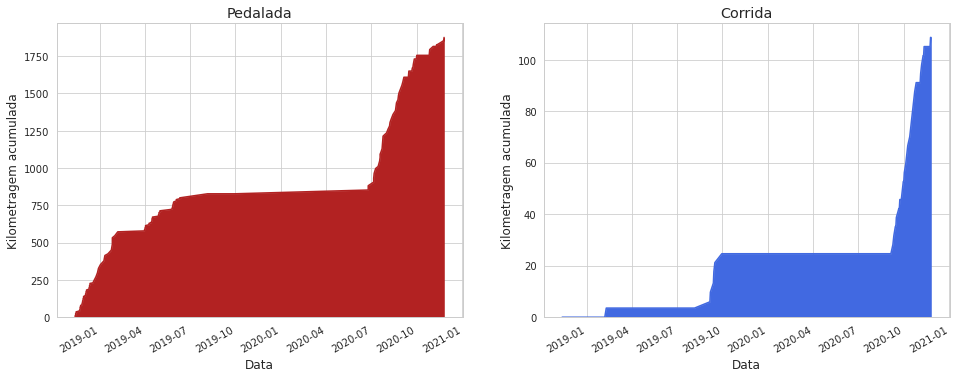

In [34]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
df['Distância Pedalada Acum. (km)'].plot(kind='area',ax=ax1,color='firebrick')
ax1.set(xlabel='Data',ylabel='Kilometragem acumulada',title='Pedalada')
df['Distância Corrida Acum. (km)'].plot(kind='area',ax=ax2,color='royalblue')
ax2.set(xlabel='Data',ylabel='Kilometragem acumulada',title='Corrida');

Analisando visualmente os valores acumulados das atividades segmentando por ano, nota-se que no ano de 2019 ocorreram poucas atividades, tanto pedaladas quanto corridas, como se pode observar com a variável de kilometragem acumulada para ambas as atividades.

Entretanto, no ano de 2020, os valores acumulados de ambas as atividades aumentou significativamente. 

- Agora, vamos ver a maior kilometragem por tipo de atividade:

In [35]:
print('Maior kilometragem:\n')
print('Pedalada:',df[df['Tipo de atividade'] == 'Pedalada']['Distância (km)'].max(),'km - Corrida:', \
df[df['Tipo de atividade'] == 'Corrida']['Distância (km)'].max(),'km')

Maior kilometragem:

Pedalada: 42.81 km - Corrida: 4.47 km


O valor da maior kilometragem de pedalada é próximo a 40 km, muito superior ao de corrida, que é próximo a 4.5 km.